In [2]:
import re
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import openpyxl

In [13]:
import re
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import openpyxl
#Creando el layout del dataframe
procesos = pd.DataFrame(
    columns=["CONTAINER ID", "NAME",  "CPU %", "MEM USAGE", "MEM %", "NET I / NET O",  "BLOCK I / BLOCK O", "PIDS", "FECHA"]
    )

#Obteniendo el total de los saltos de pagina del archivo de texto
f = open(r"C:\Users\jorge.marquez\Documents\Emerald\SBara\Performance\bara-performance-analitycs\stats.txt")
textototal = f.read()

def lineanueva(textototal):
    resultado=textototal.splitlines()
    return(len(resultado)-1)

saltosdelinea = lineanueva(textototal)
f.close() #Se cierra el archivo para poder abrirlo de nuevo y regresar a la primera línea

f = open(r"C:\Users\jorge.marquez\Documents\Emerald\SBara\Performance\bara-performance-analitycs\stats.txt")
primeralinea = f.readline()
formato="%Y-%m-%d %H:%M:%S"
resp=True
k=0
indice = 0
x=primeralinea.strip() 
while k <= saltosdelinea:
 x=primeralinea.strip()
 if __name__ == '__main__':
   lineaInvalida = "--" in x 
 if lineaInvalida:
   print("Línea invalida")
   primeralinea = f.readline() 
 else:
   if len(x) == 0:
     print(len(x))
     primeralinea = f.readline() 
   else:
     try: 
       x=primeralinea.strip()
       if resp == bool(datetime.strptime(x, formato)): #Se valida que es fecha en primeralinea)
         listaFecha = x     
         primeralinea = f.readline()          
       else: #Se valida que es fecha también en primeralinea.
         listaFecha = primeralinea  
         primeralinea = f.readline()     
     except ValueError:
       lista = [y for y in re.split("\s", x) if "" != y]
       primeralinea = f.readline() 
    
       if __name__ == '__main__':
         isPresent = "CONTAINER" in lista     
       if not isPresent: #Aqui se cargan los valores a el diccionario
         listaTres = "".join(lista[3:6])
         del lista[3:6]
         lista.insert(3, listaTres)
         listaCinco = "".join(lista[5:8])
         del lista[5:8]
         lista.insert(5, listaCinco)
         listaSeis = "".join(lista[6:9])
         del lista[6:9]
         lista.insert(6, listaSeis)
         lista.insert(8, listaFecha)
         procesos.loc[indice] = lista      
         indice += 1   
      
 k += 1



"""
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(procesos["FECHA"], procesos["CPU %"], marker = 'o')
ax.set_ylabel("Uso de CPU")
plt.show()
"""


#ax.plot(dias, temperaturas['Barcelona'], marker = 'o')


#procesos
#procesos.to_excel("procesos.xlsx", sheet_name="procesos", index=False)



Línea invalida
Línea invalida
Línea invalida
Línea invalida
Línea invalida
Línea invalida
Línea invalida
Línea invalida
Línea invalida
Línea invalida
Línea invalida
Línea invalida
Línea invalida


'\nfig, ax = plt.subplots(figsize=(12, 4))\nax.plot(procesos["FECHA"], procesos["CPU %"], marker = \'o\')\nax.set_ylabel("Uso de CPU")\nplt.show()\n'

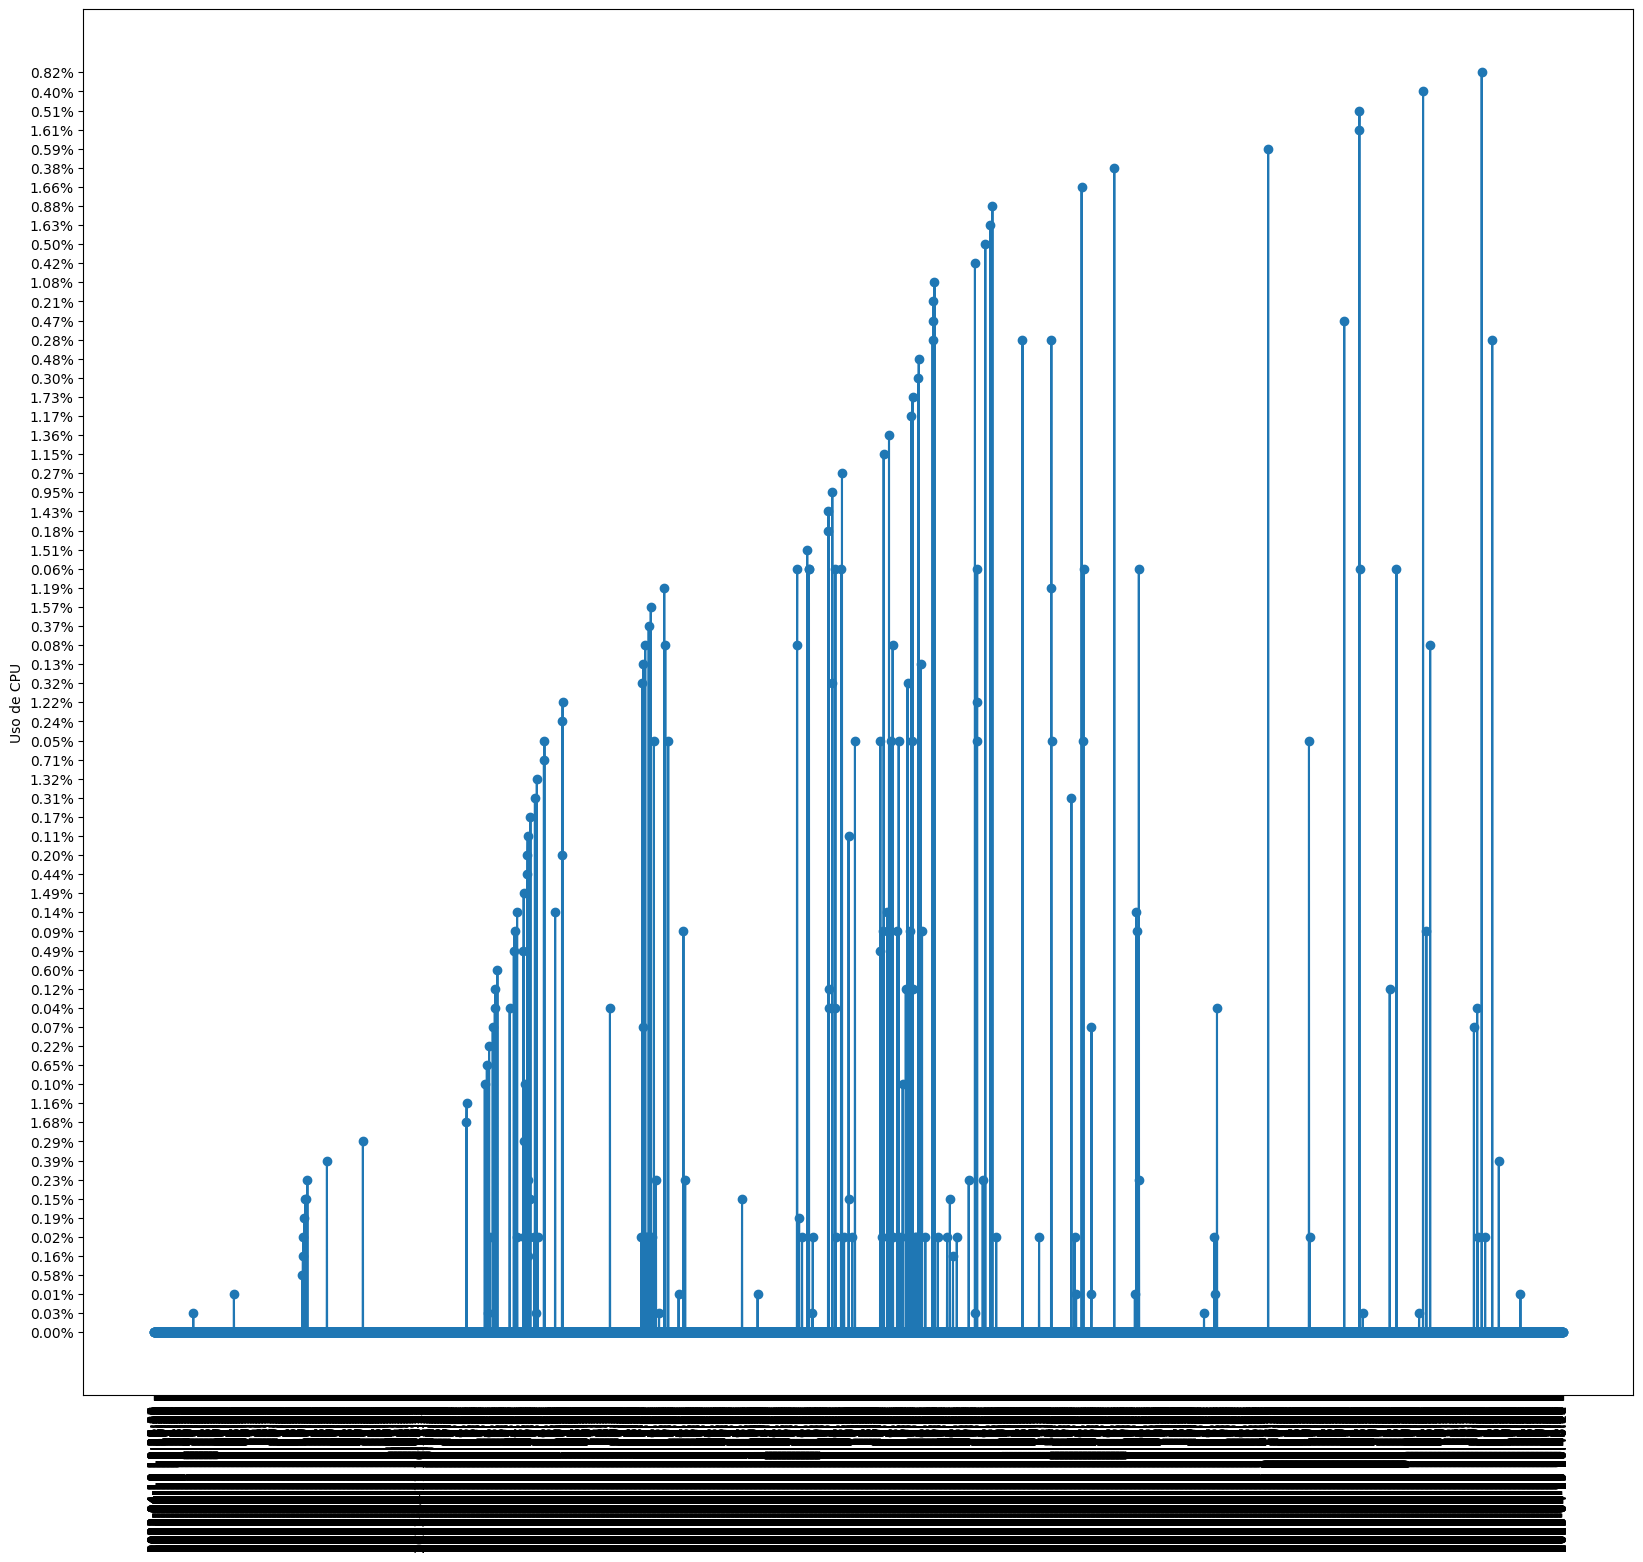

'\n    while m <= totalFilas:\n        listaFiltrada = procesosCPUFiltrados.loc[m]    \n        if nombreProceso == listaFiltrada[0]:            \n            #graficarCPU[indiceCPU] = listaFiltrada\n            indiceCPU += 1\n        \n        m += 1\n'

In [22]:
procesosCPU = procesos.loc[:, ["NAME", "CPU %", "FECHA"]]
indiceDeFiltrado = 0
m = 0
indiceCPU = 0
totalFilas = procesos.index[-1]

listaFiltrada = procesosCPU.loc[indiceDeFiltrado]
graficarCPU = procesosCPU[procesosCPU["NAME"] == listaFiltrada[0]]
procesosCPU.drop(procesosCPU[procesosCPU["NAME"] == listaFiltrada[0]].index, inplace=True)
nombreProceso = listaFiltrada[0]

fig, ax = plt.subplots(figsize=(20, 18))
ax.plot(graficarCPU["FECHA"], graficarCPU["CPU %"], marker = 'o')
ax.set_ylabel("Uso de CPU")
plt.xticks(rotation=90)
plt.show()
fig.savefig(nombreProceso + " grafica.png") 


"""
while indiceDeFiltrado <= totalFilas:
    listaFiltrada = procesosCPU.loc[indiceDeFiltrado]
    #if listafiltrada [0] == procesosCPUFiltrados[:, "NAME"]:
    
    graficarCPU = procesosCPU[procesosCPU["NAME"] == listaFiltrada[0]]
    
    procesosCPU.drop(procesosCPU[procesosCPU["NAME"] == listaFiltrada[0]].index, inplace=True)
    #nombreProceso = listaFiltrada[0]
    #m = 0
    #indiceCPU = 0
        

    indiceDeFiltrado += 1
"""

"""
    while m <= totalFilas:
        listaFiltrada = procesosCPUFiltrados.loc[m]    
        if nombreProceso == listaFiltrada[0]:            
            #graficarCPU[indiceCPU] = listaFiltrada
            indiceCPU += 1
        
        m += 1
"""


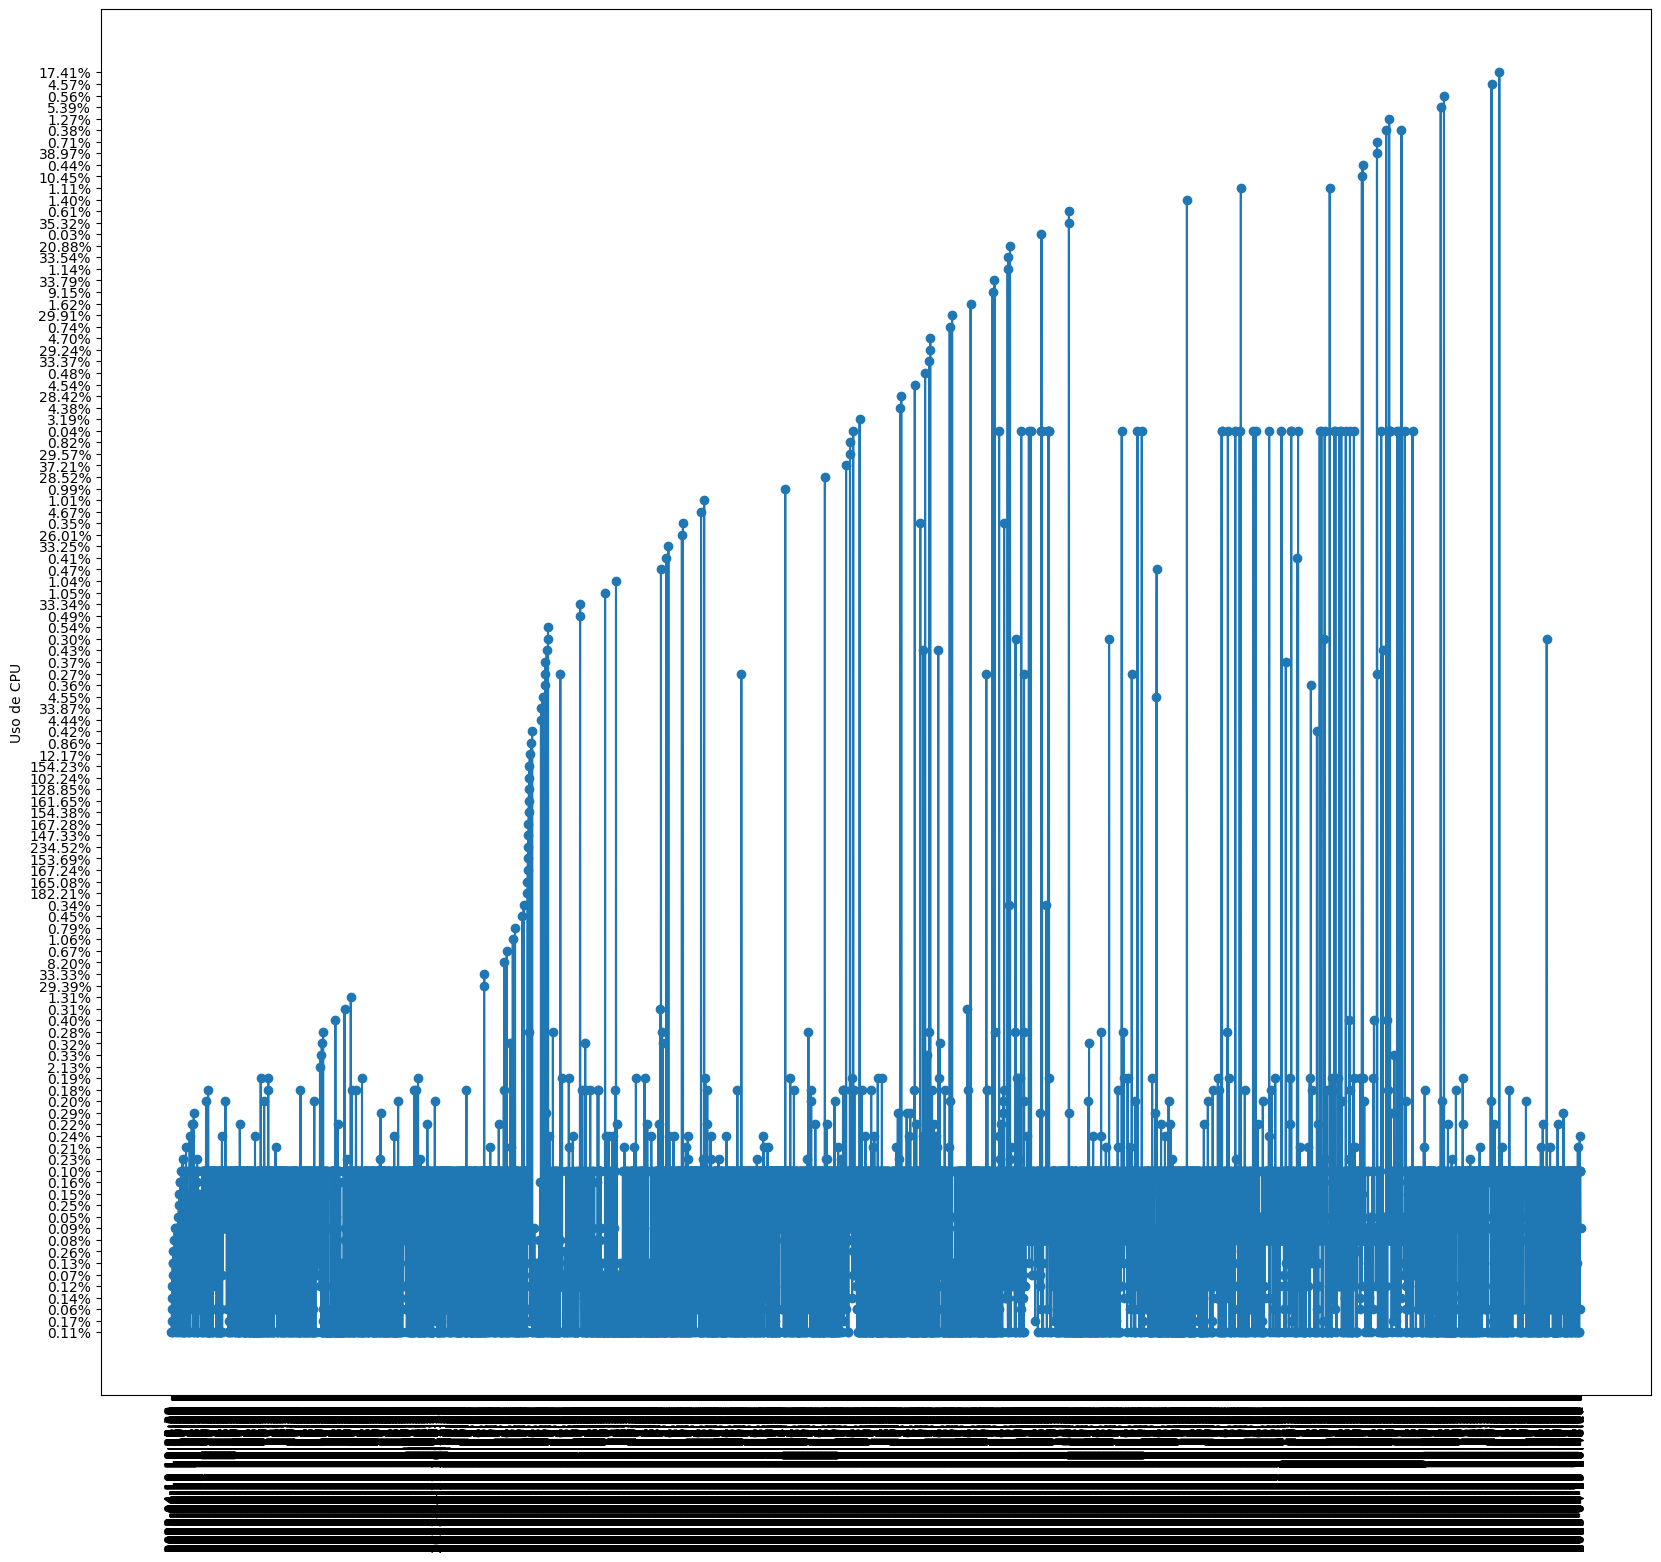

In [20]:
fig, ax = plt.subplots(figsize=(20, 18))
ax.plot(graficarCPU["FECHA"], graficarCPU["CPU %"], marker = 'o')
ax.set_ylabel("Uso de CPU")
plt.xticks(rotation=90)
plt.show()
fig.savefig(nombreProceso + " grafica.png") 

In [2]:
if len(x) == 0:
    print("0")
else:
    print(x)
print(len(x))   
print(lineaInvalida) 
procesos.to_excel("procesos.xlsx", sheet_name="procesos", index=False)

b50065e4e866   bara_redis                  0.23%     15.42MiB / 15.63GiB   0.10%     37.6MB / 25.9MB   5.23MB / 16.9MB   22
123
False


In [ ]:
if __name__ == '__main__': 
    ints = ["perro", "gato", "raton", "rata", "canario"]
    item = "gato"
 
    isPresent = item in ints
    print(isPresent)

In [ ]:
def valfecha(x, resp):
 try:
    print("Es fecha") if resp == bool(datetime.strptime(x, formato)) else print("No es fecha")
 except ValueError:
    resp = False
 if resp==False:
  print("menos")
  primeralinea = f.readline()

valfecha(x, resp)

#for saltolinea in f.readline():
#print("si") if resp == bool(datetime.strptime(x, formato)) else print("no")
#Validar si un valor es fecha
"""
def valfecha(x):
  print (x)
datetime.strptime(x, formato)
valfecha(x=primeralinea)

print("si") if resp == bool(datetime.strptime(x, formato)) else print("no")
try:
    print("si") if resp == bool(datetime.strptime(y, formato)) else print("no")
except ValueError:
    resp = False
print("si") if resp else print("no")
#print("si") if bool(datetime.strptime(z, formato)) else print("no")
"""
# crear datos falsos
df = pd. DataFrame ({'período': [1, 2, 3, 4, 5, 6, 7, 8],
                   'A': [9, 12, 15, 14, 19, 23, 25, 29],
                   'B': [5, 7, 7, 9, 12, 9, 9, 14],
                   'C': [5, 4, 7, 13, 15, 15, 18, 31]})

# trazar columnas en el gráfico de barras
print(df)
df [['período', 'A', 'B', 'C']].plot (x = 'período')